<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/05_Fusion_of_radar_and_optical_images.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 05 Fusion of Optical and Radar images</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [ ]:
import rasterio
import numpy as np
from scikeo.fusionrs import fusionrs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.0 Optical and radar image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

Additionally, radar image of Sentinel-1 with polarizations VV, VH and VV/VH was used.

The images to be used can be downloaded [here](https://drive.google.com/drive/folders/1_U5ijDH-jX6kv0_S4zsHbBzvnwicAeli?usp=sharing):

In [ ]:
path_optical = "/content/drive/MyDrive/Packages/scikit-eo_data/04_fusionrs/LC08_003069_20180906.tif"
optical = rasterio.open(path_optical)

path_radar = "/content/drive/MyDrive/Packages/scikit-eo_data/04_fusionrs/S1_2018_VV_VH.tif"
radar = rasterio.open(path_radar)

## 3.0 Results

Applying the ```fusionrs```:

In [ ]:
fusion = fusionrs(optical = optical, radar = radar)

Dictionary of results:

In [ ]:
fusion.keys()

dict_keys(['Fused_images', 'Variance', 'Proportion_of_variance', 'Cumulative_variance', 'Correlation', 'Contributions_in_%'])

Proportion of variance:

In [ ]:
prop_var = fusion.get('Proportion_of_variance')
prop_var

array([5.84147612e-01, 1.74762448e-01, 1.30081885e-01, 5.98322610e-02,
       4.33037189e-02, 3.43347674e-03, 3.29121594e-03, 8.57521102e-04,
       2.89861711e-04])

Cumulative variance (%):

In [ ]:
cum_var = fusion.get('Cumulative_variance')*100
cum_var

array([ 58.41476117,  75.89100592,  88.89919446,  94.88242056,
        99.21279245,  99.55614012,  99.88526172,  99.97101383,
       100.        ])

Showing the proportion of variance and cumulative:

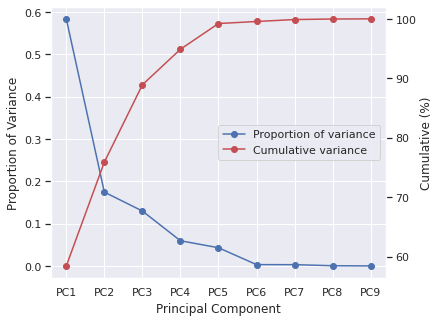

In [ ]:
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

fig, axes = plt.subplots(figsize = (6,5))
ln1 = axes.plot(x_labels, prop_var, marker ='o', markersize = 6,  label = 'Proportion of variance')

axes2 = axes.twinx()
ln2 = axes2.plot(x_labels, cum_var, marker = 'o', color = 'r', label = "Cumulative variance")

# lengend
ln = ln1 + ln2
labs = [l.get_label() for l in ln]

axes.legend(ln, labs, loc = 'center right')
axes.set_xlabel("Principal Component")
axes.set_ylabel("Proportion of Variance")
axes2.set_ylabel("Cumulative (%)")
axes2.grid(False)
plt.show()

Contributions of each variable in %:

In [ ]:
fusion.get('Contributions_in_%')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
var1,16.043756,0.243159,5.262936,7.260303,9.142863,18.109639,35.591196,0.015104,8.338550
var2,16.974924,0.047243,4.845779,4.948552,5.319659,0.106062,3.085351,1.621520,63.030753
var3,16.805855,0.000693,6.564821,2.241797,3.604979,9.399668,33.140565,0.263968,27.990115
var4,0.242084,19.361680,43.976079,30.323823,0.878147,3.350530,0.019646,1.814786,0.032435
var5,8.849515,24.705878,2.854749,17.988988,3.213649,0.253080,0.130706,41.812479,0.193113
var6,13.027914,12.986894,0.415527,17.840001,1.425612,0.455613,0.229973,53.223207,0.393410
var7,11.412442,20.836993,3.823053,0.772931,1.184136,41.689549,19.597934,0.679381,0.003338
var8,11.758016,6.267863,1.290028,7.508667,57.184241,12.958041,2.822628,0.196424,0.014622
var9,4.885495,15.549596,30.967028,11.114939,18.046714,13.677819,5.382001,0.373130,0.003662


Preparing the image:

In [ ]:
# Normalizing fractions
arr = fusion.get('Fused_images')

def stretch_percentiles(arr):
    p10 = np.percentile(arr, 10) # percentile10
    p90 = np.percentile(arr, 90) # percentile90
    clipped_arr = np.clip(arr, p10, p90)
    img = (clipped_arr - p10)/(p90 - p10)
    return img

arr_fusion = stretch_percentiles(arr)

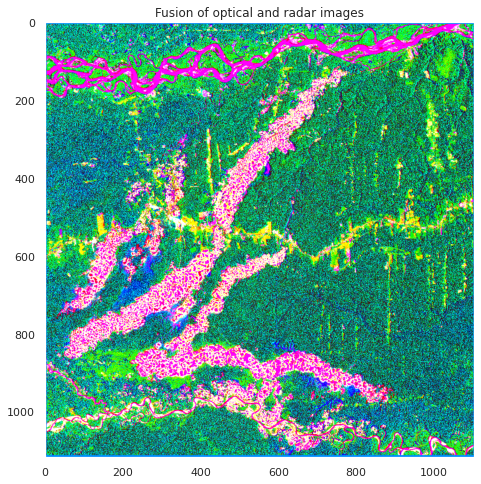

In [ ]:
# Let´s plot
fig, axes = plt.subplots(figsize = (8, 8))
axes.imshow(arr_fusion[:,:,0:3])
axes.set_title("Fusion of optical and radar images")
axes.grid(False)